# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

In [3]:
#TEST CODE WITH ONE PARTICULAR CITY
url = "https://api.openweathermap.org/data/2.5/weather?"
units='metric'

city_url = f"{url}appid={weather_api_key}&units={units}&q=London"
city_url


weather_response=requests.get(city_url)
weather_json=weather_response.json()

weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 5.9,
  'feels_like': 2.4,
  'temp_min': 4.76,
  'temp_max': 6.86,
  'pressure': 981,
  'humidity': 91},
 'visibility': 10000,
 'wind': {'speed': 5.14, 'deg': 250},
 'clouds': {'all': 100},
 'dt': 1711500314,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1711518382,
  'sunset': 1711563897},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
#TEST CODE WITH ONE PARTICULAR CITY
city_lat_test = weather_json['coord']['lat']
city_lng_test = weather_json['coord']['lon']
city_max_temp_test = weather_json['main']['temp_max']
city_humidity_test = weather_json['main']['humidity']
city_clouds_test = weather_json['clouds']['all']
city_wind_test = weather_json['wind']['speed']
city_country_test=weather_json['sys']['country']
city_date_test=weather_json['dt']

print(city_lat_test) 
print(city_lng_test)
print(city_max_temp_test)
print(city_humidity_test) 
print(city_clouds_test) 
print(city_wind_test) 
print(city_country_test)
print(city_date_test)

51.5085
-0.1257
6.86
91
100
5.14
GB
1711500314


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units='metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url)
        city_weather_json=city_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country=city_weather_json['sys']['country']
        city_date=city_weather_json['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | ambovombe
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | susuman
Processing Record 9 of Set 1 | buka
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | alotau
City not found. Skipping...
Processing Record 15 of Set 1 | puri
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | saint-joseph
Processing Record 19 of Set 1 | takoradi
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of Set 1 | cabo san lucas
Processin

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-26.32,95,87,3.02,RU,1711500615
1,arraial do cabo,-22.9661,-42.0278,23.88,87,100,2.94,BR,1711500596
2,adamstown,-25.0660,-130.1015,24.49,63,9,5.67,PN,1711500617
3,ancud,-41.8697,-73.8203,12.80,89,100,1.96,CL,1711500618
4,blackmans bay,-43.0167,147.3167,18.07,55,14,0.89,AU,1711500619


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_2.csv", index_label="City_ID")



In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-26.32,95,87,3.02,RU,1711500615
1,arraial do cabo,-22.9661,-42.0278,23.88,87,100,2.94,BR,1711500596
2,adamstown,-25.0660,-130.1015,24.49,63,9,5.67,PN,1711500617
3,ancud,-41.8697,-73.8203,12.80,89,100,1.96,CL,1711500618
4,blackmans bay,-43.0167,147.3167,18.07,55,14,0.89,AU,1711500619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

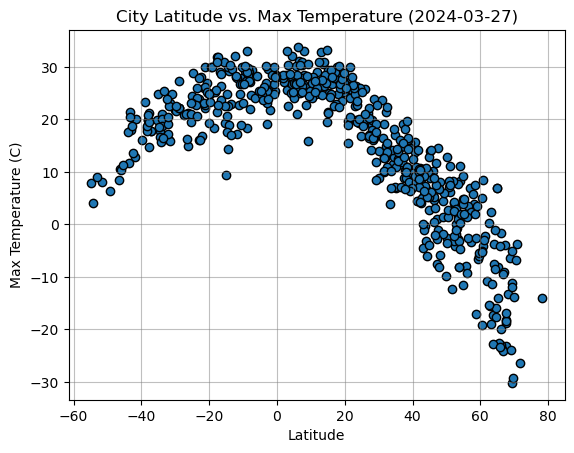

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
formatted_date = pd.to_datetime(city_date,unit='s').strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Max Temperature ({formatted_date})')
plt.grid(True, linestyle='-', color='gray', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

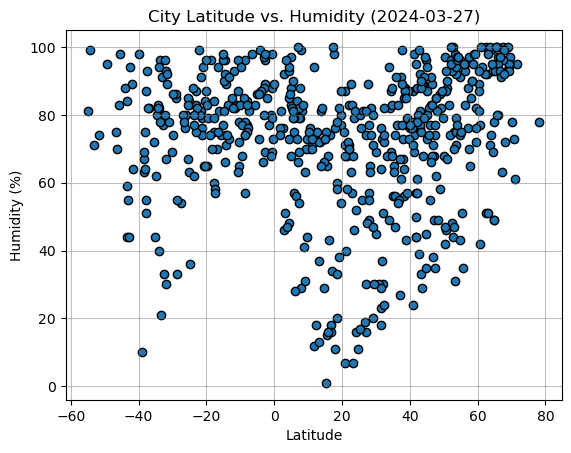

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
formatted_date = pd.to_datetime(city_date,unit='s').strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Humidity ({formatted_date})')
plt.grid(True, linestyle='-', color='gray', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

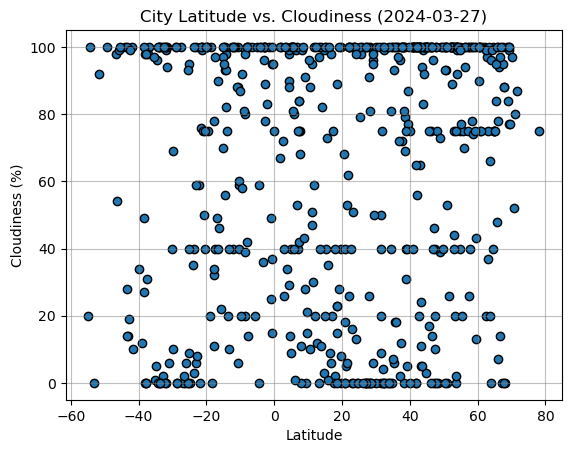

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
formatted_date = pd.to_datetime(city_date,unit='s').strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Cloudiness ({formatted_date})')
plt.grid(True, linestyle='-', color='gray', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

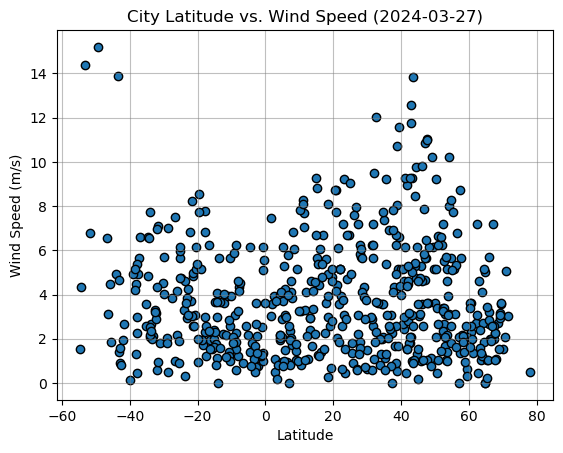

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
formatted_date = pd.to_datetime(city_date,unit='s').strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Wind Speed ({formatted_date})')
plt.grid(True, linestyle='-', color='gray', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0),:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-26.32,95,87,3.02,RU,1711500615
6,susuman,62.7833,148.1667,-15.57,92,97,0.45,RU,1711500622
7,buka,40.8108,69.1986,15.68,87,100,2.44,UZ,1711500623
8,aasiaat,68.7098,-52.8699,-6.42,93,100,2.73,GL,1711500624
9,yellowknife,62.4560,-114.3525,0.31,51,20,7.20,CA,1711500607


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0),:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arraial do cabo,-22.9661,-42.0278,23.88,87,100,2.94,BR,1711500596
2,adamstown,-25.0660,-130.1015,24.49,63,9,5.67,PN,1711500617
3,ancud,-41.8697,-73.8203,12.80,89,100,1.96,CL,1711500618
4,blackmans bay,-43.0167,147.3167,18.07,55,14,0.89,AU,1711500619
5,ambovombe,-25.1667,46.0833,20.70,84,95,5.97,MG,1711500426


###  Temperature vs. Latitude Linear Regression Plot

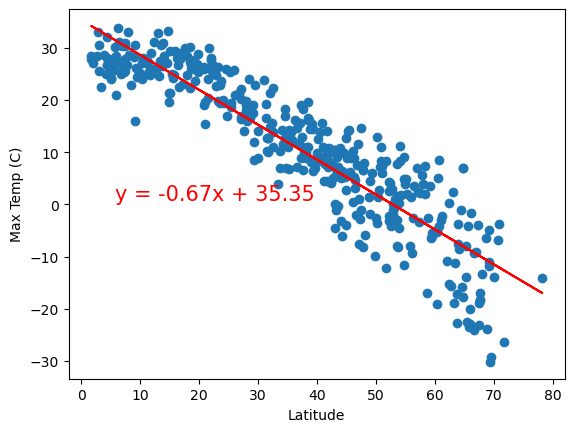

The r-value is: -0.9116082200021092


In [62]:
# Build scatter plot for latitude (Northern Hemispher) vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temp (C)")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Show plot
plt.show()

#Print the r-value
print(f'The r-value is: {rvalue}')

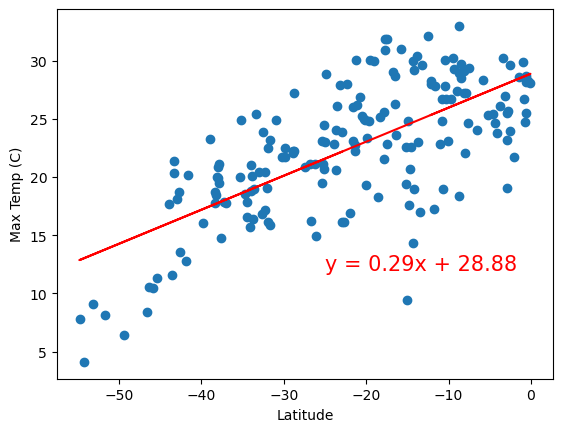

The r-value is: 0.6958370532625711


In [48]:
# Build scatter plot for latitude (Southern Hemispher) vs. temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temp (C)")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")

# Show plot
plt.show()

#Print the r-value
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:**

There is a positive correlation between the latitude in the southern hemispher and the maximum temperature: the cities that are closer to the equator (higher latitute in the southern hemispher) have higher maximum temperatures. 
There is a negative correlation between the latitude in the northern hemispher and the maximum temperature: the cities that are closer to the equator (lower latitude in the northern hemispher) have higher maximum temperatures.
We could also infer that this correlation is stronger in the northern hemispher given that the data is much more concentrated arround the correlation line and the slope appears to be steeper.

### Humidity vs. Latitude Linear Regression Plot

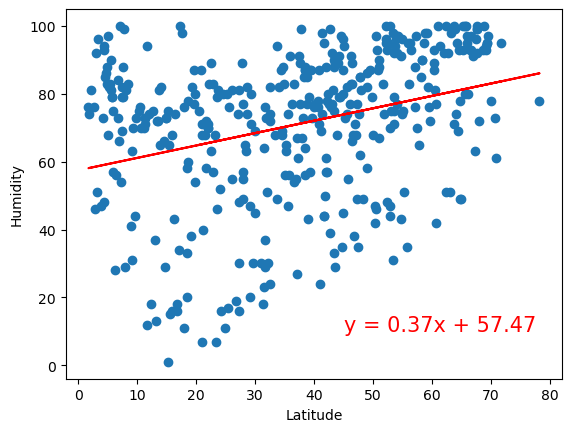

The r-value is: 0.31642334692555324


In [49]:
# Build scatter plot for latitude (Northern Hemispher) vs. humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Show plot
plt.show()

#Print the r-value
print(f'The r-value is: {rvalue}')

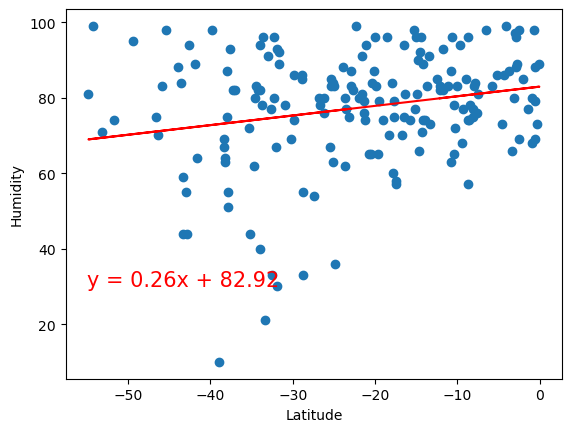

The r-value is: 0.22366550470393903


In [50]:
# Build scatter plot for latitude (Southern Hemispher) vs. humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Show plot
plt.show()

#Print the r-value
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:**
The plots show that both in the northern and in the southern hemispher there is a slightly positive correlation between the latitude and the humidity, this means that northern cities from the northern hemispher and cities closer to the equator in the shouthern hemispher are more humid. However, given that the slopes are not that steep and the r-values are closer to 0 than in the previous charts, the correlation is not that strong. In general, the humidity and the latitude do not appear to have a strong relationship as the one we've seen between maximum temperature and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

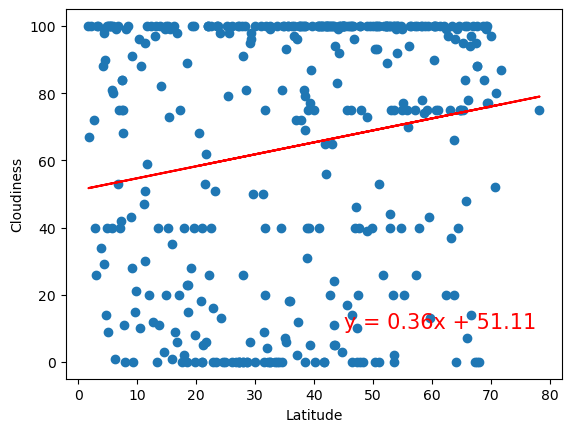

The r-value is: 0.17771872052005905


In [51]:
# Build scatter plot for latitude (Northern Hemispher) vs. cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Show plot
plt.show()

#Print the r-value
print(f'The r-value is: {rvalue}')

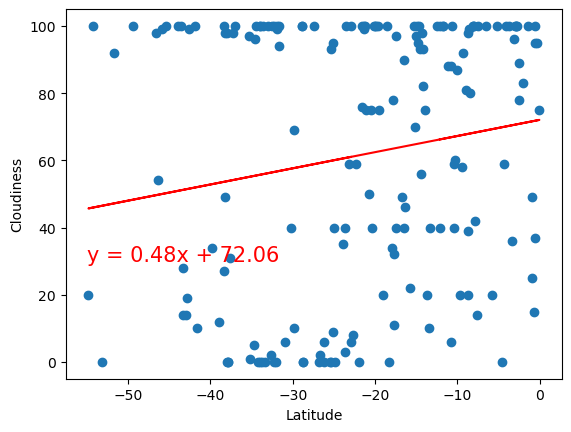

The r-value is: 0.1655394487447967


In [52]:
# Build scatter plot for latitude (Southern Hemispher) vs. cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Show plot
plt.show()

#Print the r-value
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:**
Although in both charts the regresion's slope is positive and the r-values are positive, we can't say that there is a correlation between cludiness and latitude given that the values are extremely dispersed. In addition, although r-values are positive, they are closer to 0, showing less correlation than in the first charts.

### Wind Speed vs. Latitude Linear Regression Plot

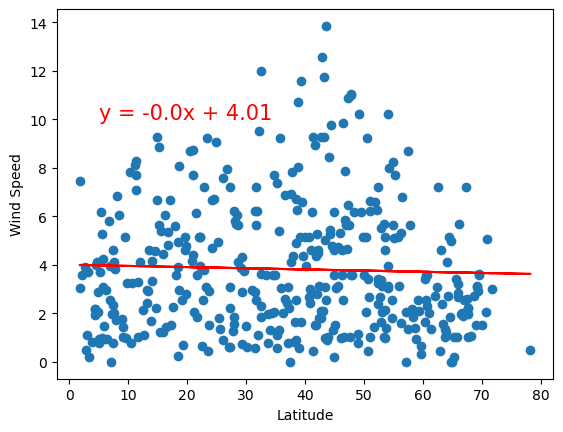

The r-value is: -0.035309699720269136


In [55]:
# Build scatter plot for latitude (Northern Hemispher) vs. wind speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

# Show plot
plt.show()

#Print the r-value
print(f'The r-value is: {rvalue}')

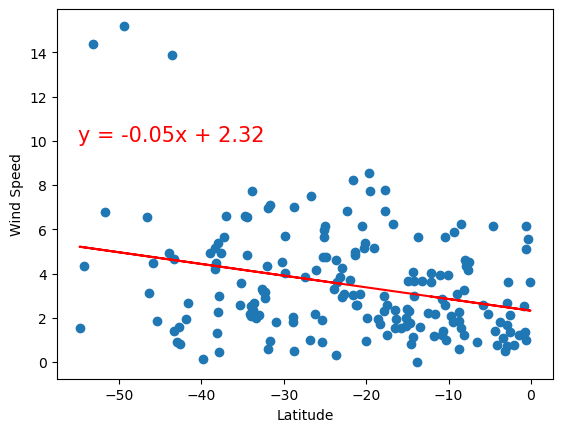

The r-value is: -0.29291572899705903


In [57]:
# Build scatter plot for latitude (Southern Hemispher) vs. wind speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Show plot
plt.show()

#Print the r-value
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:**
It doesn't appers to be a correlation between wind speed and latitude. The data is also dispersed like in the previous analysis and although the regresions have negative slopes they are not steep, showing that the relationship is not that strong.